<a href="https://colab.research.google.com/github/manobhiram-123/breast_cancer_detection_project/blob/main/model_buliding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data

In [2]:
df=pd.read_csv("breast_cancer_data.csv.csv")

# showing first 5 rows

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# mapping

In [4]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

# importing sklearn modules

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


# dividing Features and target

In [20]:
X=df.drop(['diagnosis','Unnamed: 32','id'],axis=1)
y=df['diagnosis']

# splitting data

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#standardization

In [22]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# model fitting RandomForestClassifier

In [23]:
model=RandomForestClassifier( class_weight='balanced', random_state=42)

#Feature selection using RFE

In [24]:
rfe=RFE(estimator=model,n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_features_to_select=10)

In [25]:
selected_features=X.columns[rfe.support_]
print(selected_features)

Index(['texture_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [26]:
X_train_rfe=rfe.transform(X_train)
X_test_rfe=rfe.transform(X_test)

# model building

In [27]:
model=RandomForestClassifier( class_weight='balanced', random_state=42)
model.fit(X_train_rfe,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Evalute Metrics -Accuracy,Confusion_matrix,Classification_report

In [28]:
y_pred_rfe=model.predict(X_test_rfe)
print("accuracy_score :",accuracy_score(y_test,y_pred_rfe))
print("confusion_matrix :")
cm=confusion_matrix(y_test,y_pred_rfe)
print(confusion_matrix(y_test,y_pred_rfe))
print("classification_report :")
print(classification_report(y_test,y_pred_rfe))

accuracy_score : 0.956140350877193
confusion_matrix :
[[69  2]
 [ 3 40]]
classification_report :
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# confusion_matrix graph

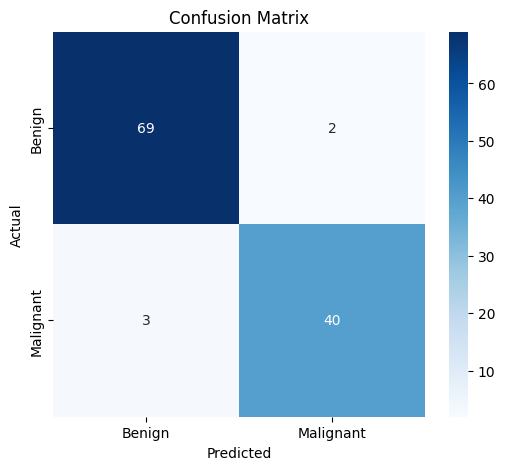

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [29]:
rf = RandomForestClassifier(random_state=42)

# Hypertuning using RandomizedSearchCV

In [32]:
param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_rfe, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': np.int64(200), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}


In [34]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_rfe)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 3 40]]
